In [45]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [46]:
#jo var and outputs we need to discard we take it in "_"
X, _ = make_blobs(n_samples=1000, centers=5,random_state=4)
print(X.shape)

(1000, 2)


<function matplotlib.pyplot.show(*args, **kw)>

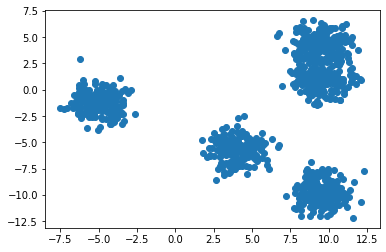

In [47]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show

In [48]:
k = 5

colors = ['pink','blue','green','red','orange'] #creating list of colors, jisse hum harr cluster ko color assign kr sake

clusters = {} #dictionary of cluster

for ix in range(k):
    center = 10.0*(2*np.random.random( (X.shape[1],) ) -1 )
    #np.random generate value from 0 to 1 multiply it by 2 we get 0 to 2 then subtract 1 we get -1 to 1 then multiply by 10 we get -10 to 10
    points = []
    
    cluster = {
        "center" : center,
        "points" : points,
        "color" : colors[ix]
    }
    
    clusters[ix] = cluster
    
print(clusters) 

{0: {'center': array([ 1.08666276, -4.50277523]), 'points': [], 'color': 'pink'}, 1: {'center': array([-1.52161723, -1.0874465 ]), 'points': [], 'color': 'blue'}, 2: {'center': array([ 0.21564701, -7.15545844]), 'points': [], 'color': 'green'}, 3: {'center': array([-8.22850079, -3.59386876]), 'points': [], 'color': 'red'}, 4: {'center': array([-2.67881932,  8.78366096]), 'points': [], 'color': 'orange'}}


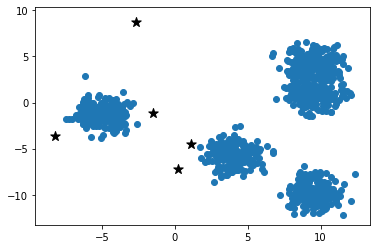

In [49]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
for ix in range(k):
    plt.scatter(clusters[ix]["center"][0], clusters[ix]["center"][1], color="black", marker="*", s=100)
plt.show()

In [50]:
def distance(v1,v2):
    return np.sqrt(np.sum( (v1-v2)**2 ) )

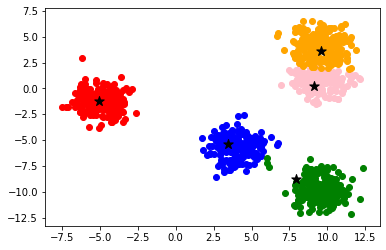

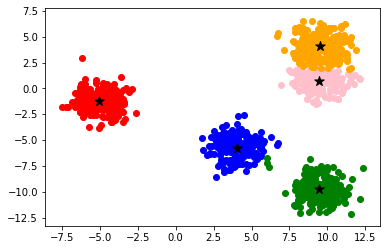

In [54]:
for ix in range(X.shape[0]):
    
    dis = []
    curr_p = X[ix]
    
    for kx in range(k):
        d = distance(curr_p, clusters[kx]["center"])
        dis.append(d)
        
    assined_cluster = np.argmin(dis)
        
    clusters[assined_cluster]["points"].append(curr_p)

    
for kx in range(k):
    pnts = np.array(clusters[kx]["points"])
    
    clusters[kx]["coords"] = pnts
    
plt.figure(0)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"])
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    

for kx in range(k):
    
    if clusters[kx]["coords"].shape[0]>0:
        new_center = clusters[kx]["coords"].mean(axis=0)
    else:
        new_center = clusters[kx]["center"]
        
    clusters[kx]["center"] = new_center
    clusters[kx]["points"] = []
    
plt.figure(1)
for kx in range(k):
    pts = clusters[kx]["coords"]
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]["color"])
    except:
        pass
    
    plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = "black", marker = "*", s=100)
    
plt.show()  